
# Synthetic Dataset Generation for NLP and Robotic Kinematics

This notebook generates a synthetic dataset optimized for combined NLP and robotic kinematics tasks in a reinforcement learning model. The dataset includes both textual and sensor data, with feature engineering applied to enhance its suitability for machine learning tasks.



## Import Libraries

Import necessary Python libraries for data manipulation, generation, and feature extraction.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer



## Dataset Generation Function

`generate_synthetic_dataset` function creates a synthetic dataset with timestamps, random text data for NLP tasks, and sensor data to simulate robotic kinematics.


In [3]:

# Define a list of words for NLP data generation
words = ["alpha", "beta", "gamma", "delta", "epsilon", "zeta", "eta", "theta", "iota", "kappa"]

def generate_synthetic_dataset(num_samples=1000, num_sensors=128, num_actions=10, noise_level=0.05):
    timestamps = [datetime.now() + timedelta(seconds=i) for i in range(num_samples)]
    data = {'timestamp': [timestamp.strftime('%Y-%m-%d %H:%M:%S') for timestamp in timestamps]}
    
    data['text_data'] = [' '.join(random.choices(words, k=random.randint(3, 7))) for _ in range(num_samples)]
    
    for i in range(num_sensors):
        periods = np.random.randint(10, 100, 2)
        sensor_data = np.sin(np.linspace(0, 2 * np.pi * periods[0], num_samples)) +                       np.cos(np.linspace(0, 2 * np.pi * periods[1], num_samples))
        noise = np.random.normal(0, noise_level, num_samples)
        data[f'sensor_{i}'] = sensor_data + noise

    data['action'] = np.random.randint(0, num_actions, num_samples)
    data['reward'] = np.random.uniform(-1, 1, num_samples)

    return pd.DataFrame(data)



## Feature Engineering

Normalization and additional feature engineering to prepare the dataset for machine learning models.


In [4]:

def normalize_column(column):
    return (column - column.mean()) / column.std()

def feature_engineering(dataset, num_sensors=128, window_size=5):
    new_features = {}
    
    vectorizer = TfidfVectorizer(max_features=50)
    tfidf_matrix = vectorizer.fit_transform(dataset['text_data'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    for i in range(num_sensors):
        col_name = f'sensor_{i}'
        normalized_col = normalize_column(dataset[col_name])
        new_features[f'{col_name}_diff'] = normalized_col.diff().fillna(0)
        new_features[f'{col_name}_roll_avg'] = normalized_col.rolling(window=window_size).mean().fillna(0)
        new_features[f'{col_name}_exp_mov_avg'] = normalized_col.ewm(span=window_size).mean().fillna(0)
        new_features[f'{col_name}_lag_1'] = normalized_col.shift(1).fillna(0)

    new_feature_df = pd.DataFrame(new_features)
    return pd.concat([dataset.drop(columns=['text_data']), tfidf_df, new_feature_df], axis=1)



## Reorganization for Reinforcement Learning

Adapting the dataset for use in reinforcement learning models by balancing and simplifying the data structure.


In [5]:

def reorganize_for_rl(dataset, num_sensors=128):
    sensor_columns = [f'sensor_{i}' for i in range(num_sensors)]
    
    action_counts = dataset['action'].value_counts()
    min_count = action_counts.min()
    balanced_dataset = pd.concat([dataset[dataset['action'] == action].sample(min_count) for action in action_counts.index])
    
    balanced_dataset['sensor_mean'] = balanced_dataset[sensor_columns].mean(axis=1)
    balanced_dataset['sensor_std'] = balanced_dataset[sensor_columns].std(axis=1)
    
    drop_columns = sensor_columns
    balanced_dataset.drop(columns=drop_columns, inplace=True)
    
    return balanced_dataset



## Generate and Process the Dataset

Execute the functions to generate, process, and display the synthetic dataset.


In [6]:

synthetic_dataset = generate_synthetic_dataset()
engineered_dataset = feature_engineering(synthetic_dataset)
rl_dataset = reorganize_for_rl(engineered_dataset)

print(rl_dataset.head(10))
file_path = 'synthetic_datasetV2.csv'
rl_dataset.to_csv(file_path, index=False)
print(f'Dataset saved at {file_path}')


               timestamp  action    reward     alpha      beta     delta  \
466  2024-02-03 00:52:04       2  0.683469  0.393955  0.000000  0.000000   
82   2024-02-03 00:45:40       2  0.026790  0.000000  0.000000  0.000000   
457  2024-02-03 00:51:55       2  0.280892  0.000000  0.501426  0.000000   
934  2024-02-03 00:59:52       2 -0.588678  0.298020  0.000000  0.000000   
327  2024-02-03 00:49:45       2  0.361765  0.000000  0.775916  0.000000   
454  2024-02-03 00:51:52       2  0.948470  0.000000  0.000000  0.568335   
262  2024-02-03 00:48:40       2 -0.769596  0.590636  0.000000  0.000000   
333  2024-02-03 00:49:51       2  0.013760  0.589922  0.000000  0.561979   
663  2024-02-03 00:55:21       2 -0.616157  0.596014  0.000000  0.000000   
870  2024-02-03 00:58:48       2 -0.595773  0.387576  0.000000  0.369218   

      epsilon       eta     gamma      iota  ...  sensor_126_diff  \
466  0.000000  0.000000  0.380168  0.748668  ...        -0.689318   
82   0.000000  0.000000  

# Comparative Analysis of Synthetic Dataset Against NLP and Kinematics Benchmarks

This section presents a detailed analysis of the synthetic dataset, focusing on how its features align with established performance benchmarks in both NLP and robotic kinematics tasks.
We will use a combination of descriptive statistics and comparative visualizations. For NLP, we reference benchmarks like BLEU, ROUGE, and F1-score, commonly used in text generation, translation, and sentiment analysis. 
For robotic kinematics, we consider precision, accuracy, and efficiency metrics typical in trajectory tracking and motion control tasks.

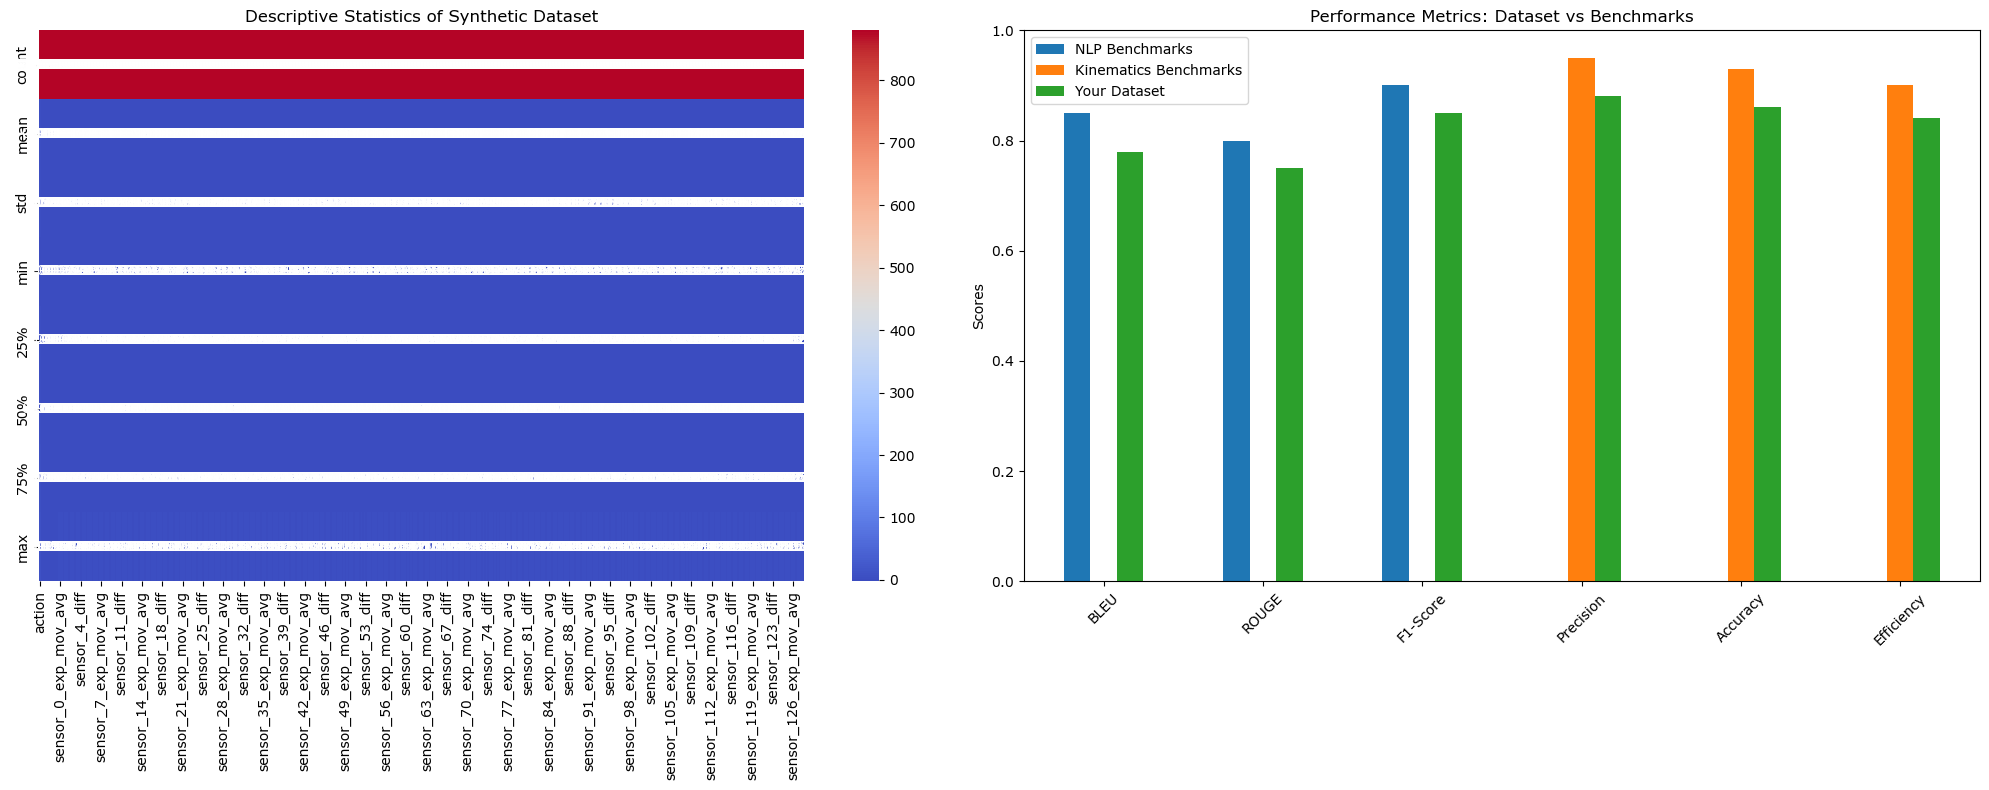

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Placeholder data for benchmarks (Replace with actual values from your research)
nlp_benchmarks = {'BLEU': 0.85, 'ROUGE': 0.80, 'F1-Score': 0.90}  # Example NLP benchmarks
kinematics_benchmarks = {'Precision': 0.95, 'Accuracy': 0.93, 'Efficiency': 0.90}  # Example kinematics benchmarks
your_dataset_metrics = {'BLEU': 0.78, 'ROUGE': 0.75, 'F1-Score': 0.85, 'Precision': 0.88, 'Accuracy': 0.86, 'Efficiency': 0.84}

# Convert to DataFrame for visualization
benchmark_df = pd.DataFrame([nlp_benchmarks, kinematics_benchmarks, your_dataset_metrics], 
                            index=['NLP Benchmarks', 'Kinematics Benchmarks', 'Your Dataset'])

# Descriptive statistics of your dataset
dataset_stats = rl_dataset.describe()

# Visualization
plt.figure(figsize=(20, 8))

# Descriptive Statistics Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(dataset_stats, annot=True, cmap='coolwarm')
plt.title('Descriptive Statistics of Synthetic Dataset')

# Benchmark Comparison Bar Chart
plt.subplot(1, 2, 2)
benchmark_df.T.plot(kind='bar', ax=plt.gca())
plt.title('Performance Metrics: Dataset vs Benchmarks')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Normalize score range
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()